
# Scores
1. Accuracy score: ratio of correct predictions to total predictions.
2. Precision score: percentage of companies which are predicted bankrupt and are actually bankrupt (in case of high precision, it may label a healthy company as bankrupt).
3. Recall score: out of all bankrupt companies, how many was the model able to catch. if missing real bankruptcies is actually very costly, we go with the model with high recall score.
4. ROC AUC score: measure the model's ability to distinguish between classes across all thresholds. 0.5 is a random guess and 1.0 is for perfect model. It is a general performance metric. higher the value of ROC_AUC score, better is the model.

In [ ]:
'''
importing libraries
data preprocessing
data changes
training snd testingon different models
accuracy comparison
chnages
'''

'\nimporting libraries\ndata preprocessing\ndata changes\ntraining snd testingon different models\naccuracy comparison\nchnages\n'

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00


In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder #for scaling the data
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score  #to predict all scores

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [ ]:
# Bankruptcy data upload
data=pd.read_csv('/content/drive/MyDrive/Datasets/bankruptcy data.csv')
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
#  splitting the bankruptcy target and other columns
target = data['Bankrupt?']
df=data.drop('Bankrupt?', axis=1)

In [ ]:
#train and test data split directly from the dataset
x_train, x_test, y_train, y_test=train_test_split(df, target, test_size=0.3, random_state=42)

In [ ]:
df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
# making a dataset unique_df containing the columns name and no. of unique values each of them have
unique_df=df.nunique().reset_index()
unique_df.columns=['column name', 'unique values']

In [ ]:
# eliminating the unique_df column which has only one unique value; one unique value means that column doesn't account for any change
unique_df[unique_df['unique values']==1]

,column name,unique values
93,Net Income Flag,1


In [ ]:
df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
df.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [ ]:
df.columns.tolist()

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net 

In [ ]:
df=df.drop(columns=[' Net Income Flag'])

In [ ]:
models={
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'MLP': MLPClassifier(max_iter=500),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'Catboost': CatBoostClassifier(verbose=0)
}

In [ ]:
# making a dictionary results with key as the model name and values as the accuracy, precision, recall and ROC AUC score
results = {}
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)    # predicting the target values for x_test
  # get the predicted probabilities for positive class only if it supports predict_proba for that model
  y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
  acc=accuracy_score(y_test, y_pred)
  recall=recall_score(y_test, y_pred)
  roc_auc=roc_auc_score(y_test, y_proba)
  precision=precision_score(y_test, y_pred)
  results[name]={
      'accuracy': round(acc, 4),
      'precision': round(precision, 4),
      'recall': round(recall, 4),
      'roc_auc': round(roc_auc, 4)
  }


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:52:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 142, number of negative: 4631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23711
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029751 -> initscore=-3.484701
[LightGBM] [Info] Start training from score -3.484701


In [ ]:
# converts results into a dataframe with all scores rounded off to 4 decimal points for better representation
results=pd.DataFrame.from_dict(results, orient='index')
print(results)

                     accuracy  precision  recall  roc_auc
Logistic Regression    0.9575     0.0909  0.0128   0.5428
KNN                    0.9614     0.3333  0.0128   0.5981
Decision Tree          0.9497     0.3377  0.3333   0.6537
Random Forest          0.9658     0.7857  0.1410   0.9372
SVM                    0.9619     0.0000  0.0000   0.5503
MLP                    0.9545     0.1429  0.0385   0.5110
XGBoost                0.9629     0.5333  0.2051   0.9292
LightGBM               0.9619     0.5000  0.1538   0.9465
Catboost               0.9663     0.7143  0.1923   0.9499


In [ ]:
# Performing PCA on df
from sklearn.decomposition import PCA
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
scaled_data

pca=PCA(n_components=40)
pca.fit(scaled_data)

x_pca=pca.transform(scaled_data)
df_xpca=pd.DataFrame(data=x_pca, columns=[f'PC{i+1}' for i in range (x_pca.shape[1])])


In [ ]:
df_xpca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-7.338294,0.373294,-0.309014,-1.021642,0.162798,1.448300,-0.710590,1.195317,-0.535536,1.665768,...,0.248062,-0.411924,-0.013823,-0.140721,-0.611356,0.288946,-0.381571,-0.030965,-0.205160,-0.588351
1,-2.703713,-0.986346,-2.155617,-2.473644,0.835692,0.607047,-0.324441,1.361657,-0.409246,0.693192,...,-2.224416,0.869992,1.238017,-6.483038,0.280998,0.005947,-1.987698,0.065384,0.114701,1.305720
2,-4.307059,-0.404700,-0.309801,-0.729865,0.335723,-0.198898,0.016022,0.562789,-0.501530,1.793298,...,0.995351,1.888172,0.240538,-1.114340,-0.216189,-0.645280,-3.090194,0.550834,-2.896436,-0.086918
3,-5.830736,-1.385669,-1.301105,-2.160071,0.731532,1.043664,0.558476,-0.195704,0.705732,0.024977,...,-0.120880,-1.020692,-0.468019,0.929775,-0.242126,-0.707236,-0.415909,0.087361,-0.345511,0.342475
4,-2.343197,-0.201748,0.806267,-0.894912,0.203652,0.266931,0.349238,-0.201997,0.604713,-1.176532,...,-0.559934,-0.534730,-0.583013,0.919719,-0.301166,-0.039076,0.537024,0.522366,-0.519575,-0.428387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-1.177758,-0.508512,0.189843,0.236673,0.063634,-0.119839,-0.003317,-0.016923,0.183337,-0.105128,...,-0.137503,0.385036,0.026889,0.147828,0.192617,0.017264,-0.324351,-0.055440,-0.091900,-0.541232
6815,-1.282275,-0.663230,0.247693,-0.445795,0.231082,-0.793491,0.162475,-0.405410,0.340139,-0.678577,...,1.019942,-0.015942,0.250039,-0.150258,0.368184,0.110606,0.458621,0.001430,0.603426,0.821035
6816,1.910308,-1.693786,-1.409778,0.955907,-0.078499,-2.136376,0.162903,-1.400768,-0.171034,1.419627,...,1.607293,0.935726,0.129869,-0.262703,0.028144,-0.468867,-0.996332,0.547982,1.350357,0.205554
6817,1.854261,-0.397923,-0.488640,0.720515,-0.043994,0.648606,0.384830,-0.354668,1.185545,0.338063,...,0.290272,2.404927,0.092614,-0.601179,-0.559948,0.191187,-0.122595,-0.027861,0.396490,0.705406


In [ ]:
# plotting the role of different PCA columns in variance

components = [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]
fig=px.bar(
    x=components,
    y=pca.explained_variance_ratio_,
    title='Proportion of variance in each principal components',
)
fig.show()


In [ ]:
# shows the correlation matrix of different columns

In [ ]:
 #training the reduced data

x_train, x_test, y_train, y_test=train_test_split(df_xpca, target, test_size=0.3, random_state=42)

results = {}
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
  acc=accuracy_score(y_test, y_pred)
  recall=recall_score(y_test, y_pred)
  roc_auc=roc_auc_score(y_test, y_proba)
  precision=precision_score(y_test, y_pred)
  results[name]={
      'accuracy': round(acc, 4),
      'precision': round(precision, 4),
      'recall': round(recall, 4),
      'roc_auc': round(roc_auc, 4)
  }



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:53:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[LightGBM] [Info] Number of positive: 142, number of negative: 4631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029751 -> initscore=-3.484701
[LightGBM] [Info] Start training from score -3.484701


In [ ]:
results=pd.DataFrame.from_dict(results, orient='index')
print(results)

                     accuracy  precision  recall  roc_auc
Logistic Regression    0.9619     0.5000  0.0769   0.8747
KNN                    0.9614     0.4783  0.1410   0.7592
Decision Tree          0.9423     0.2368  0.2308   0.6006
Random Forest          0.9633     1.0000  0.0385   0.8895
SVM                    0.9619     0.0000  0.0000   0.7872
MLP                    0.9555     0.3725  0.2436   0.8252
XGBoost                0.9638     0.5714  0.2051   0.8997
LightGBM               0.9658     0.7000  0.1795   0.9011
Catboost               0.9648     0.7500  0.1154   0.9298


In [ ]:
# trained a random forest classifier on the training data
# extracting feature  importances from the trained model

x_train, x_test, y_train, y_test=train_test_split(df, target, test_size=0.3, random_state=42)
model=RandomForestClassifier()
model.fit(x_train, y_train)
importance=model.feature_importances_
feature_names=x_train.columns

feat_imp_df=pd.DataFrame({
    'Feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

#Why is this approach good?

Dimensionality reduction: using only top 15 features reduces noise, prevents overfitting, and improves training speed.

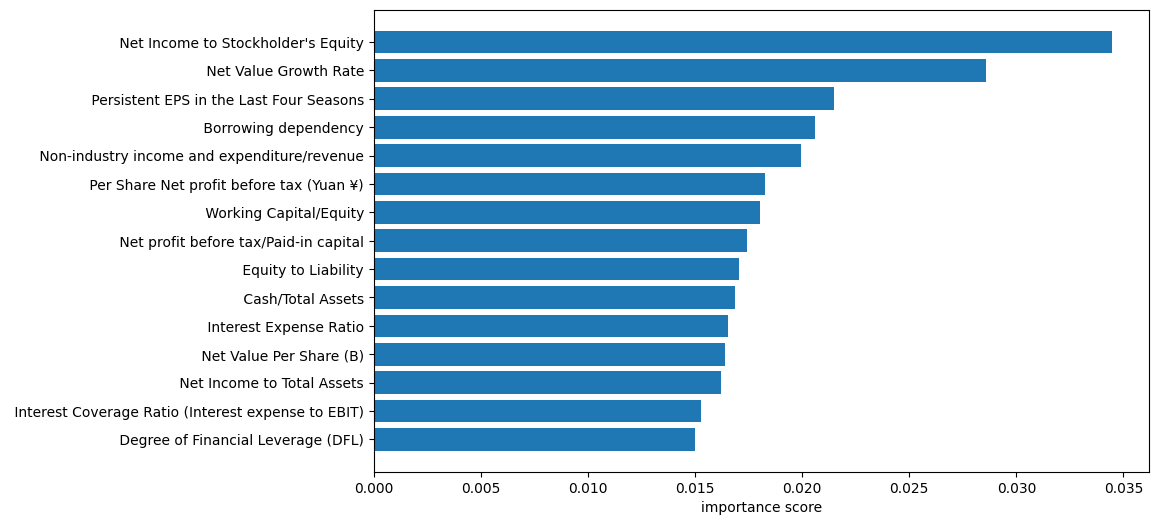

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:15], feat_imp_df['importance'][:15])
plt.gca().invert_yaxis()
plt.xlabel('importance score')
plt.show()

In [ ]:
top_15=feat_imp_df['Feature'].head(15).tolist()
x_train_15=x_train[top_15]
x_test_15=x_test[top_15]

In [ ]:
top_15

[" Net Income to Stockholder's Equity",
 ' Net Value Growth Rate',
 ' Persistent EPS in the Last Four Seasons',
 ' Borrowing dependency',
 ' Non-industry income and expenditure/revenue',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Working Capital/Equity',
 ' Net profit before tax/Paid-in capital',
 ' Equity to Liability',
 ' Cash/Total Assets',
 ' Interest Expense Ratio',
 ' Net Value Per Share (B)',
 ' Net Income to Total Assets',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Degree of Financial Leverage (DFL)']

In [ ]:
df[top_15].tail()

,Net Income to Stockholder's Equity,Net Value Growth Rate,Persistent EPS in the Last Four Seasons,Borrowing dependency,Non-industry income and expenditure/revenue,Per Share Net profit before tax (Yuan ¥),Working Capital/Equity,Net profit before tax/Paid-in capital,Equity to Liability,Cash/Total Assets,Interest Expense Ratio,Net Value Per Share (B),Net Income to Total Assets,Interest Coverage Ratio (Interest expense to EBIT),Degree of Financial Leverage (DFL)
6814,0.840359,0.000450,0.216602,0.373823,0.303510,0.172102,0.736716,0.171111,0.029890,0.099481,0.631415,0.175045,0.799927,0.566193,0.027064
6815,0.840306,0.000445,0.216697,0.372505,0.303520,0.172780,0.734584,0.171805,0.038284,0.080337,0.631489,0.181324,0.799748,0.566018,0.027009
6816,0.840138,0.000435,0.210929,0.369637,0.303512,0.173232,0.737432,0.172287,0.097649,0.412885,0.630612,0.269521,0.797778,0.565158,0.026791
6817,0.841084,0.000529,0.228326,0.369649,0.303498,0.185584,0.736713,0.182498,0.044009,0.112238,0.630731,0.213392,0.811808,0.565302,0.026822
6818,0.841019,0.000519,0.227758,0.370049,0.313415,0.182119,0.737286,0.179911,0.233902,0.238147,0.630618,0.220766,0.815956,0.565167,0.026793


In [ ]:
results = {}
for name, model in models.items():
  model.fit(x_train_15, y_train)
  y_pred=model.predict(x_test_15)
  y_proba = model.predict_proba(x_test_15)[:, 1] if hasattr(model, "predict_proba") else None
  acc=accuracy_score(y_test, y_pred)
  recall=recall_score(y_test, y_pred)
  roc_auc=roc_auc_score(y_test, y_proba)
  precision=precision_score(y_test, y_pred)
  results[name]={
      'accuracy': round(acc, 4),
      'precision': round(precision, 4),
      'recall': round(recall, 4),
      'roc_auc': round(roc_auc, 4)
  }


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:53:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 142, number of negative: 4631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029751 -> initscore=-3.484701
[LightGBM] [Info] Start training from score -3.484701


In [ ]:
results=pd.DataFrame.from_dict(results, orient='index')
print(results)

                     accuracy  precision  recall  roc_auc
Logistic Regression    0.9624     1.0000  0.0128   0.9264
KNN                    0.9638     0.5714  0.2051   0.7925
Decision Tree          0.9482     0.3056  0.2821   0.6283
Random Forest          0.9629     0.5455  0.1538   0.9249
SVM                    0.9619     0.0000  0.0000   0.5313
MLP                    0.9633     0.6364  0.0897   0.9383
XGBoost                0.9629     0.5417  0.1667   0.9236
LightGBM               0.9643     0.6190  0.1667   0.9421
Catboost               0.9668     0.7273  0.2051   0.9375


In [ ]:
# storing the best model

import joblib
best_model=CatBoostClassifier(verbose=0).fit(x_train_15, y_train)
joblib.dump(best_model, '/content/drive/MyDrive/Colab_Notebooks/best_bankruptcy_model.pkl')

print("Catboost saved as the best bankruptcy model.pkl")

Catboost saved as the best bankruptcy model.pkl


In [ ]:
# defining a function to predict based on user input
def y_predict(x_test_15):
  loaded_model = joblib.load('/content/drive/MyDrive/Colab_Notebooks/best_bankruptcy_model.pkl')
  y_pred=loaded_model.predict(x_test_15)
  return y_pred


#Financial Insights

Here are top 15 features of our bankruptcy prediction data, which have the biggest impacts:

Feature	Financial Insight
1. Net Value Growth Rate:	Measures how fast the company’s equity is growing. A declining or negative value indicates the company’s net worth is shrinking, which is a warning sign of financial distress.
2. Net Profit Before Tax / Paid-in Capital:	Shows return on shareholder investment. A low or negative value means the company is not efficiently using the invested capital to generate profits — often a red flag.
3. Net Income to Stockholder’s Equity (ROE):	Indicates how well the company uses equity to generate net income. Falling ROE suggests poor profitability or high debt burden.
4. Per Share Net Profit Before Tax:	A measure of profitability per share. Consistently low or negative per-share profits point to declining business performance and reduce investor confidence.
5. Borrowing Dependency:	Reflects how much the company relies on debt for funding. High values suggest vulnerability to interest rates and repayment pressure, making it prone to bankruptcy.
6. Cash / Current Liability:	Indicates short-term liquidity. A low ratio means the company may not have enough cash to pay its current bills, increasing insolvency risk.
7. Net Income to Total Assets (ROA):	Shows efficiency of asset use in generating income. Low ROA suggests the company is not using its assets productively, which often precedes financial trouble.
8. Interest Coverage Ratio (Interest Expense to EBIT):	Measures ability to cover interest with operating earnings. Low values mean difficulty servicing debt, a common precursor to bankruptcy.
9. Interest Expense Ratio: Reflects how much of income is eaten up by interest payments. A high ratio implies excessive debt pressure, weakening the company’s profit margin.
10. Persistent EPS in the Last Four Seasons: Tracks earnings stability. Inconsistent or negative EPS over multiple quarters suggests unreliable profits and increased risk.
11. Net Value Per Share (A):	Represents equity per share. A falling trend indicates erosion of shareholder value, typically due to losses or asset devaluation.
12. Degree of Financial Leverage (DFL):	Captures sensitivity of earnings to changes in revenue due to debt. High DFL makes earnings more volatile and signals fragility under stress.
13. Non-industry Income and Expenditure / Revenue:	Measures dependency on non-core income. High values imply the business cannot sustain itself from its main operations, which is not sustainable.
14. Interest-Bearing Debt Interest Rate: Indicates the cost of borrowed funds. Higher rates suggest risky borrowing or lack of creditworthiness — signs of weakening financial health.
15. Cash / Total Assets: Shows what portion of assets is liquid cash. A low ratio means poor liquidity, and in hard times, the company might not survive short-term shocks.

Based on the top 15 features, the model emphasizes:

🟥 1. Profitability & Efficiency
Net income-based metrics (e.g., ROE, ROA, EPS) are critical.

Declining profit margins, inconsistent earnings, and weak asset utilization are strong bankruptcy predictors.

🟧 2. Debt & Leverage Risk
Borrowing dependency, interest expense ratios, and DFL show that high leverage is dangerous.

Your model is detecting that companies struggling with debt servicing are at high risk.

🟦 3. Liquidity & Cash Flow
Ratios like cash/current liability and cash/total assets signal that liquidity crunches trigger bankruptcy, even for temporarily profitable businesses.

🟨 4. Stability & Sustainability
Persistent EPS and non-core income ratios indicate that unstable earnings or reliance on non-operating revenue is unsustainable and dangerous.

